<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/210414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#다음 시험은 캐글 타이타닉
import graphviz as gv

gv.__version__

'0.10.1'

In [ ]:
#결정트리

#엔트로피를 최소화하는 기준으로 분리해 나감.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # stratify : target:
# tree = DecisionTreeClassifier(random_state=0)

####
estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6]}
#param_grid = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], max_features:[None,'sqrt','log2',3,4,5]}
#grid = GridSearchCV(estimator, param_grid=param_grid)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print('best :', grid.best_score_)
print('best prams : ', grid.best_params_,'\n')
####

#tree = DecisionTreeClassifier(max_depth=4, random_state=42) #.988 / .944
#Accuracy on test set: 0.9440559440559441
tree = DecisionTreeClassifier(max_depth=3, random_state=42) #.977 /.944
#Accuracy on test set: 0.9440559440559441
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {}".format(tree.score(X_test, y_test)))

print("gscv acc on test set : ", grid.score(X_test, y_test))

best : 0.92018779342723
best prams :  {'criterion': 'gini', 'max_depth': 5} 

Accuracy on training set: 0.977
Accuracy on test set: 0.9440559440559441
gscv acc on test set :  0.9440559440559441


In [ ]:
#독버섯


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.shape

(8124, 23)

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isna().sum() #결측치 확인

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:

# 인코딩 문자들 모두 숫자로 라벨링.
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for columns in data.columns:
    data[columns] = labelencoder.fit_transform(data[columns])

In [ ]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [ ]:
#라벨 분리
y=data['class']
X=data.drop('class',axis=1)
data.corr() #피쳐 관계

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize':'x-large',
          'axes.labelsize':'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large' }
pylab.rcParams.update(params)

In [ ]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


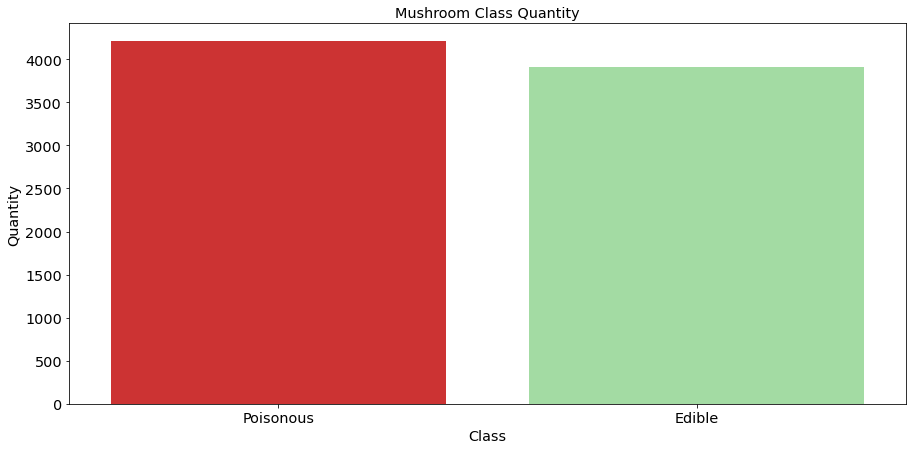

In [ ]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


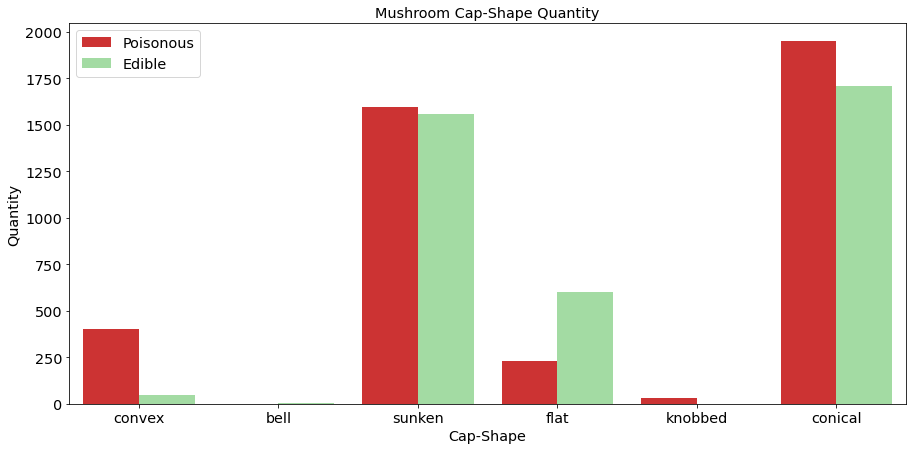

In [ ]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


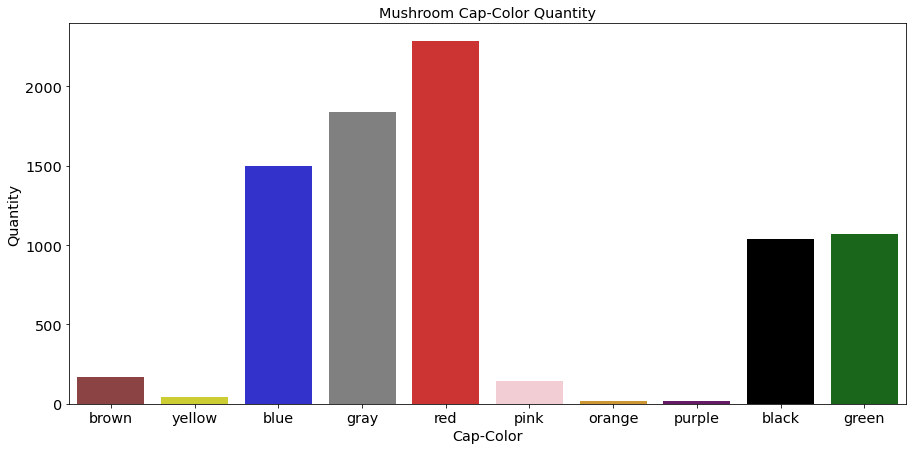

In [ ]:

color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


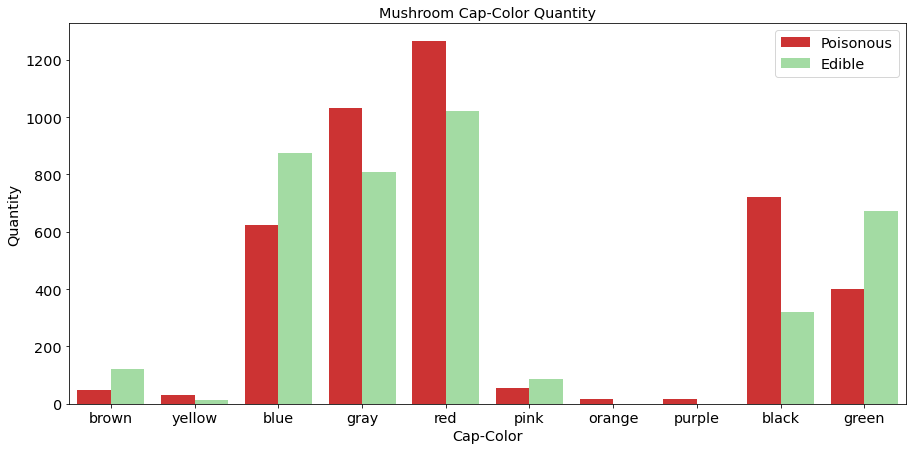

In [ ]:
plot_col(col='cap-color', hue='class', labels=color_dict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


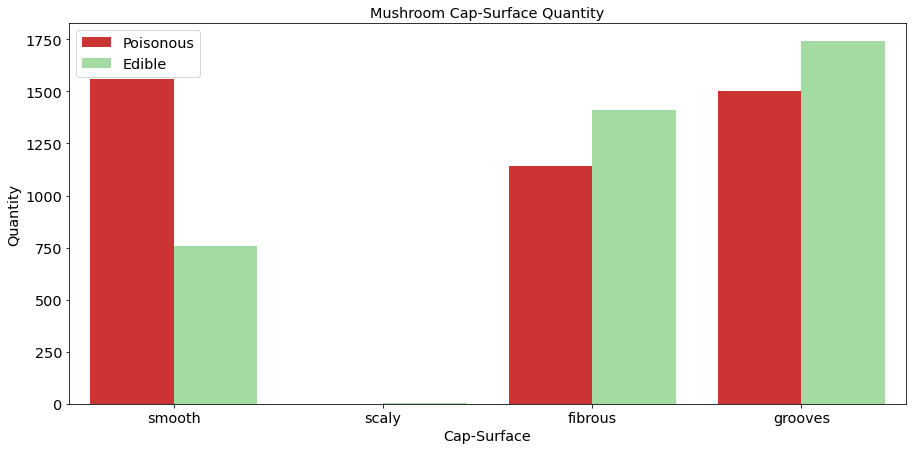

In [ ]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [ ]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


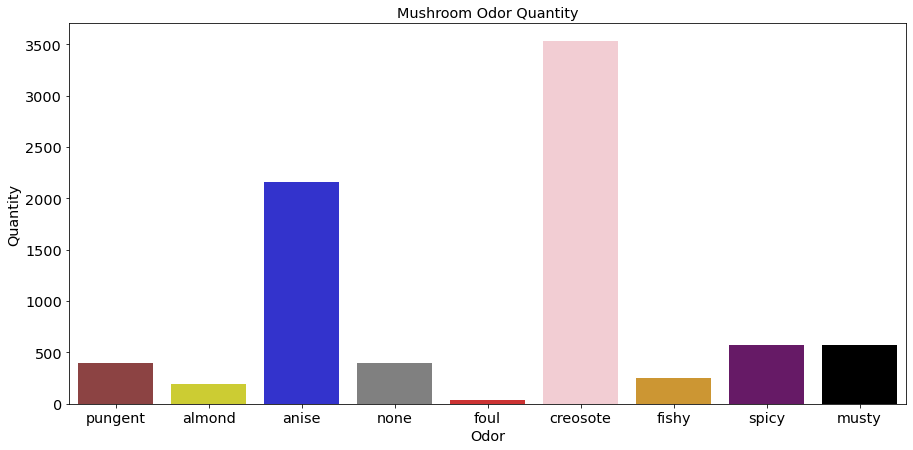

In [ ]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

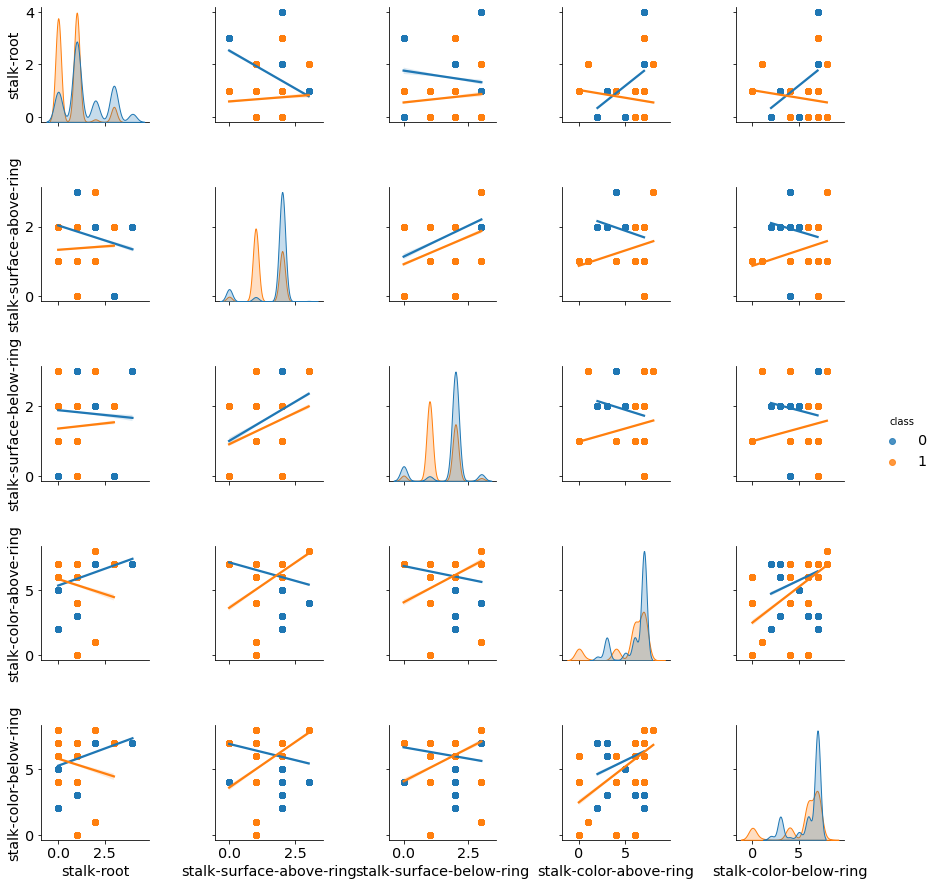

In [ ]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = data[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

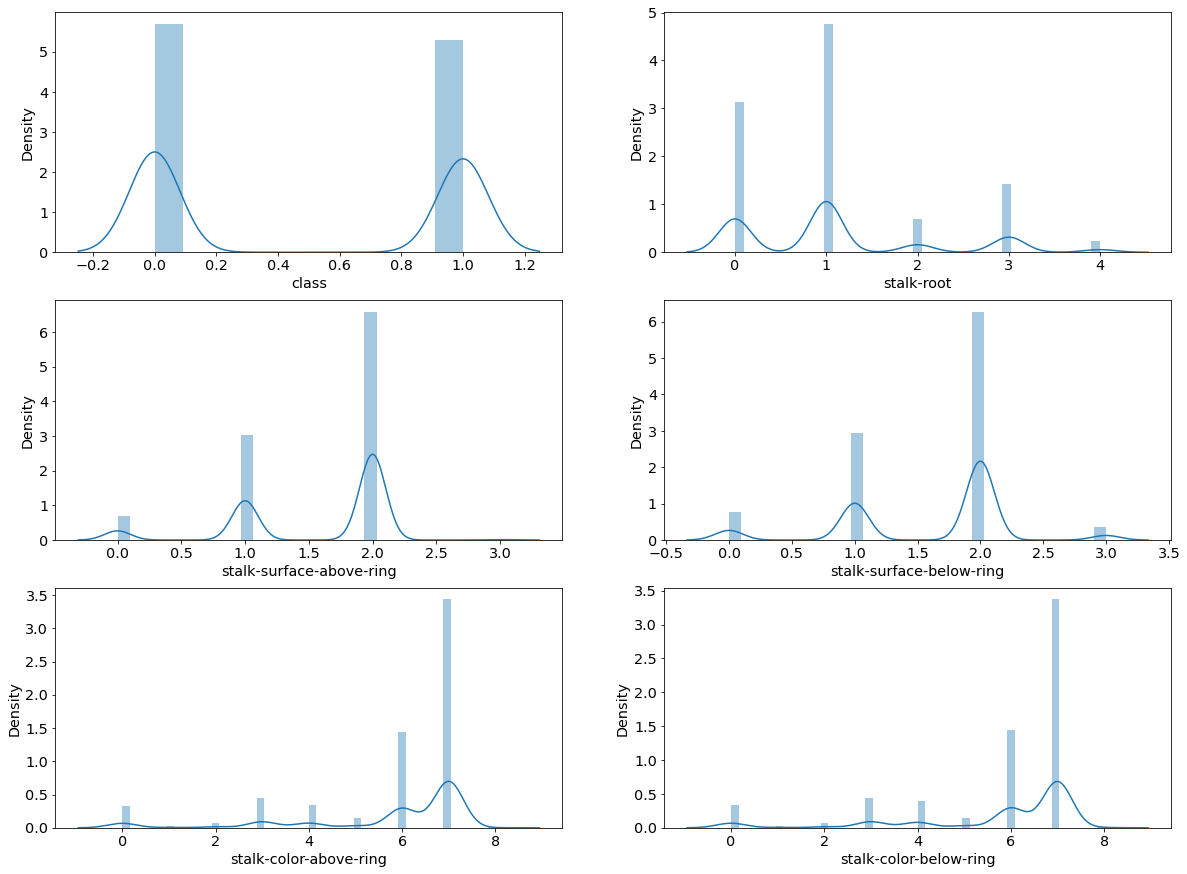

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

In [ ]:
#graph
import plotly.graph_objs as go
import plotly.express as px

labels = ['Edible', 'Poison']
values = data['class'].value_counts()

fig=go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#87CEFA', '#7FFF00'],
                              line=dict(color='#FFFFFF',width=3)))
fig.show()

In [ ]:
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste']
values = data['habitat'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00', 
          '#F8F8FF','#FFE4C4','#FF69B4']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0.1, 0, 0, 0, 0.2, 0, 0])])
fig.update_traces(title='Mushrooms Habitat Percentage',
                  hoverinfo='label+value', 
                  textinfo='percent', 
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                             line=dict(color='#000000', width=0.1)),
                 )
fig.show()

In [ ]:
labels = ['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 
          'Cinnamon', 'Purple', 'Green']
values = data['cap-color'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00', 
          '#F8F8FF','#FFE4C4','#FF69B4','#F0DC82','#C000C5', '#228B22']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0])])
fig.update_traces(title='Mushrooms Color Quantity',
                  hoverinfo='label+percent', 
                  textinfo='value',
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                             line=dict(color='#000000', width=0.1)),
                 )
fig.show()

In [ ]:
colors = ['#DEB887','#f8f8ff','#778899', '#FF69B4','#FFFF00','#B22222','#FFE4C4','#F0DC82','#C000C5', '#228B22']
fig = px.histogram(data, x='cap-color',
                   color_discrete_map={'p':'#7FFF00'},
                   #opacity=0.8,
                   color_discrete_sequence=[colors],
                   #barmode='relative',
                   barnorm='percent',
                   color='class'
                  )
fig.update_layout(title='Edible or Poisonous Percent Based on Cap Color',
                  xaxis_title='Cap Color',
                  yaxis_title='Quantity',
                 )

fig.show()

In [ ]:

fig = px.histogram(data, x='odor',
                   color_discrete_map={'p':'#7FFF00', 'e':'#87CEFA'},
                   #opacity=0.8,
#                    color_discrete_sequence='Green',
                   barmode='group',
#                    barnorm='percent',
                   color='class'
                  )
fig.update_layout(title='Edible or Poisonous vs Odor',
                  xaxis_title='Cap Color',
                  yaxis_title='Quantity',
                  #title_x=0.5,
                 )

fig.show()

In [ ]:

fig = px.histogram(data, x='cap-shape',
                   color_discrete_map={'p':'#7FFF00', 'e':'#87CEFA'},
                   #opacity=0.8,
                   color_discrete_sequence=[colors],
                   barmode='group',
                   #barnorm='percent',
                   color='class'
                  )
fig.update_layout(
                  xaxis_title='Cap Shape',
                  yaxis_title='Quantity',
                  #title_x=0.5,
                 )

fig.show()

In [ ]:
gill_cats = ['class', 'gill-size', 'gill-attachment', 'gill-spacing', 'gill-color']
gill_data = data[gill_cats]
gill_corr = gill_data.corr() 
# gill_corr['class'].sort_values(ascending=False)

fig = px.imshow(gill_corr,
                color_continuous_scale = 'Greens',
                color_continuous_midpoint=0,
               )
fig.update_layout(title="Gill Categories Correlation Matrix")
fig.show()

In [ ]:
stalk_cats = ['class', 'stalk-shape', 'stalk-color-below-ring', 'stalk-color-above-ring', 
              'stalk-surface-below-ring', 'stalk-surface-above-ring', 'stalk-root']
stalk_data = data[stalk_cats]
stalk_corr = stalk_data.corr() 
# stalk_corr['class'].sort_values(ascending=False)

fig = px.imshow(stalk_corr,
                color_continuous_scale = 'purples',
                color_continuous_midpoint=0,
               )
fig.update_layout(title="Stalk Categories Correlation Matrix")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6093, 22) (6093,)
(2031, 22) (2031,)


<Figure size 144x72 with 0 Axes>

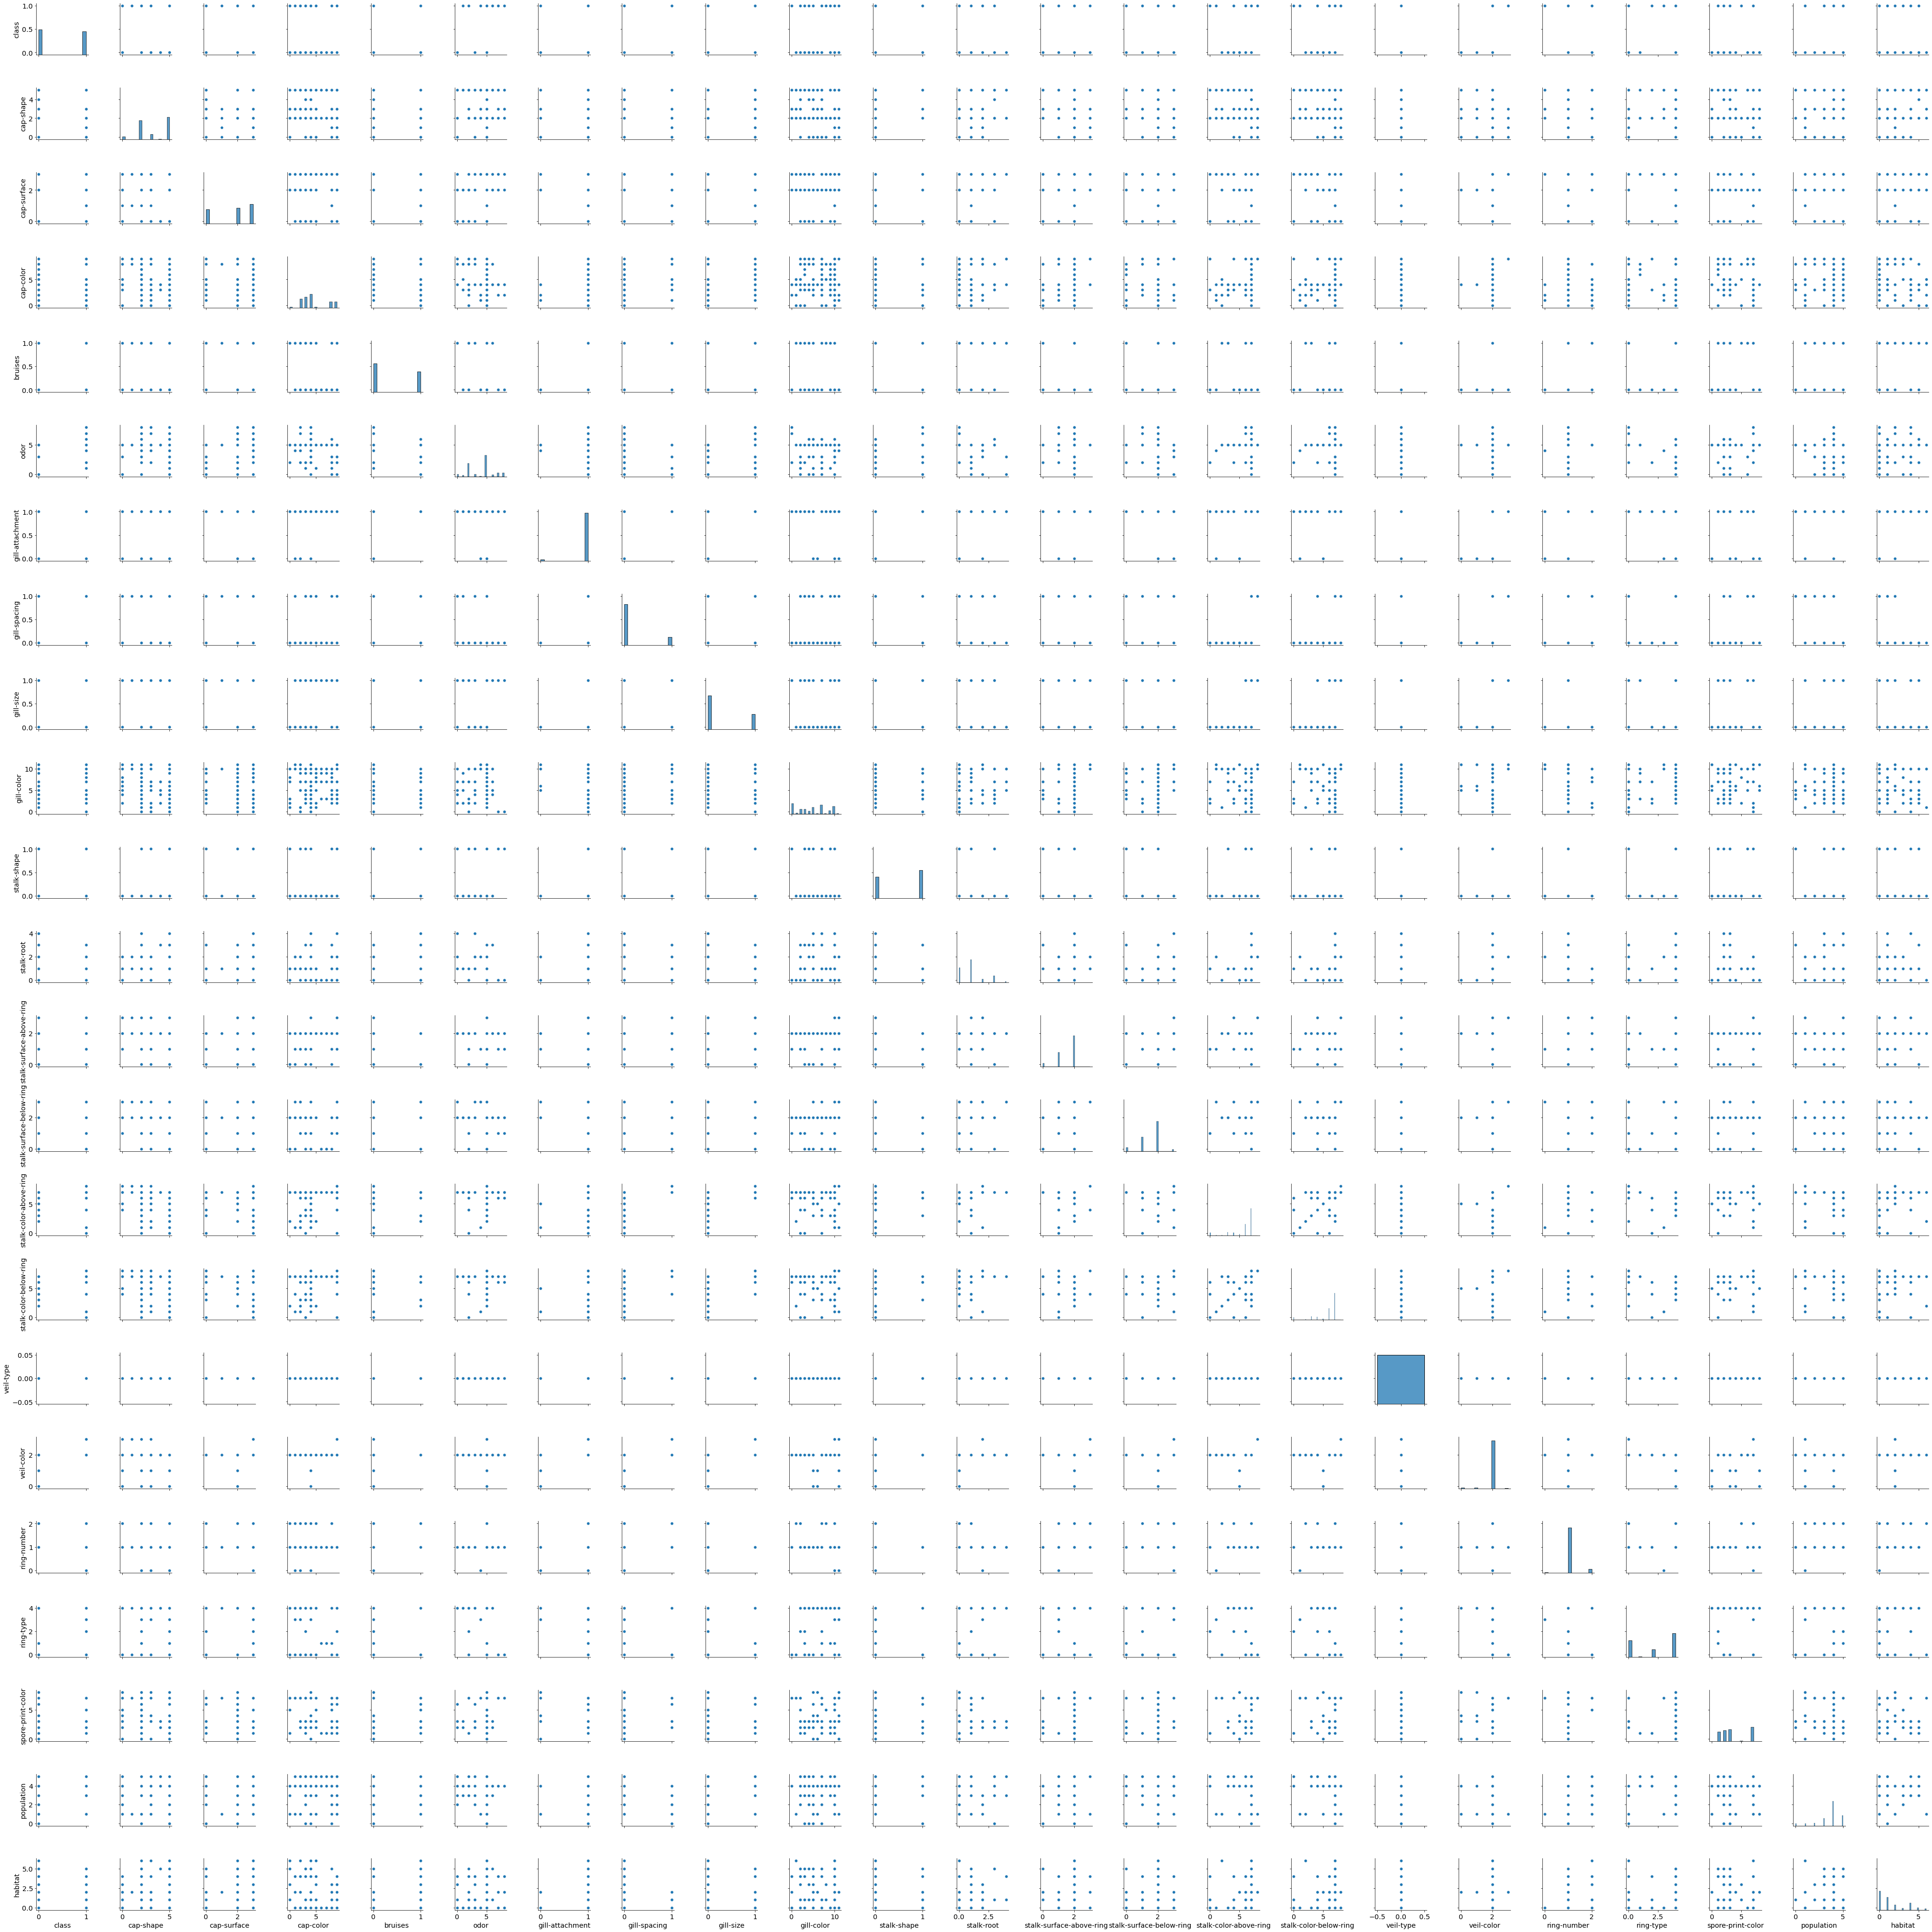

In [ ]:
plt.figure(figsize=(2,1))
sns.pairplot(data,height = 2.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



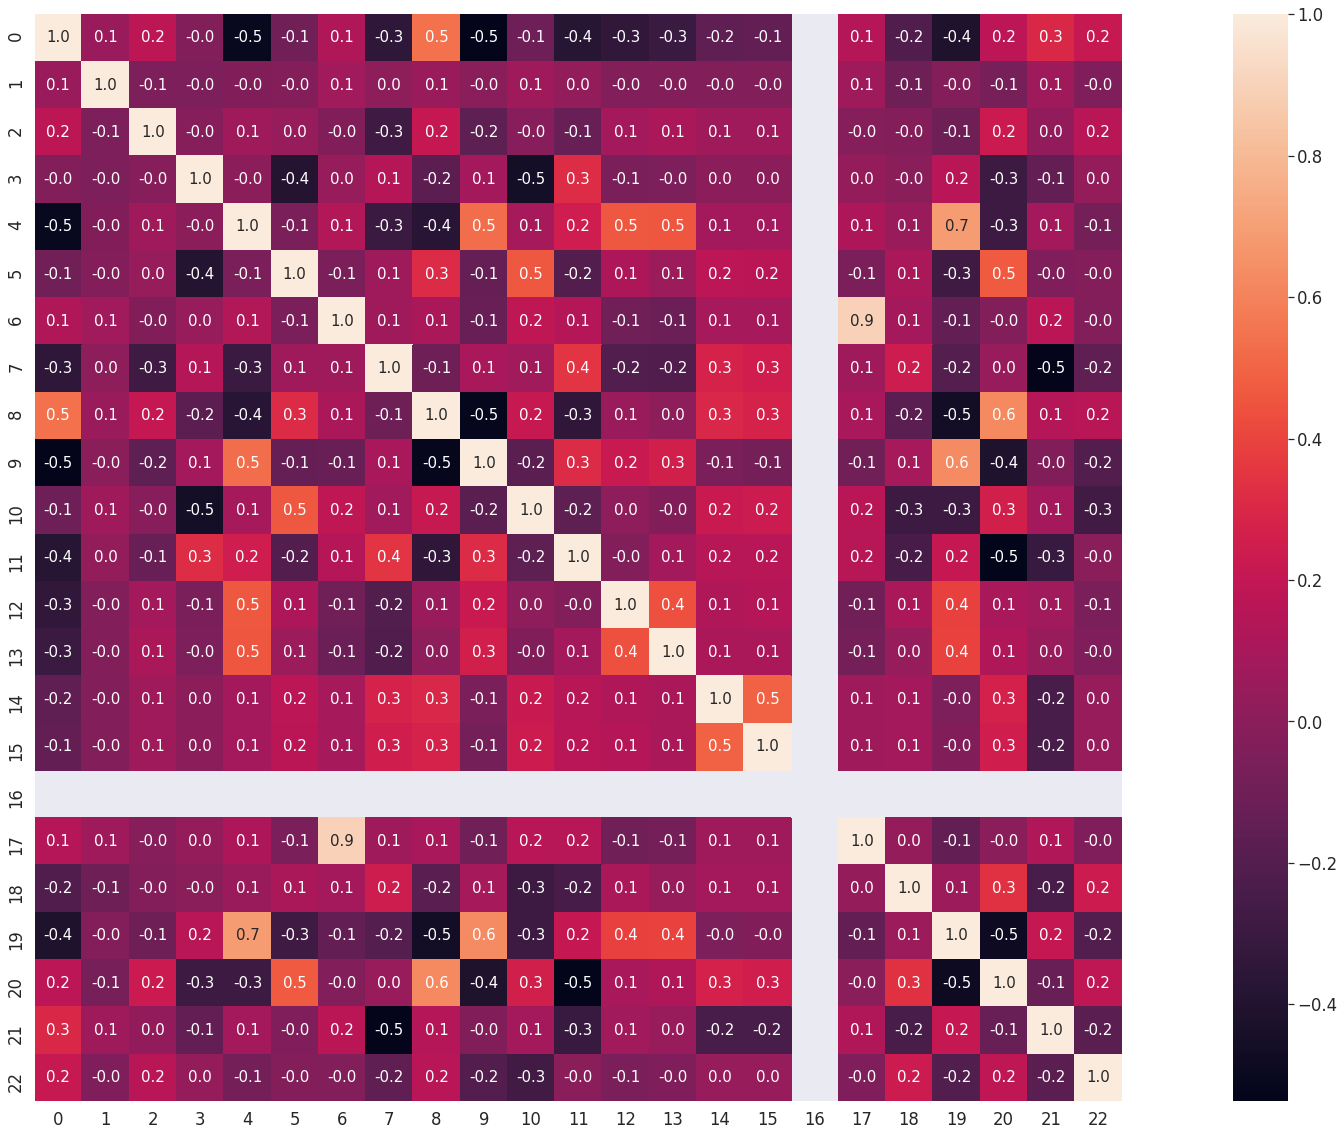

In [ ]:
plt.figure(figsize=(40,20))
cm = np.corrcoef(data.values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True , annot=True,square=True,fmt='.1f',annot_kws={'size':15})
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


Decision = DecisionTreeClassifier()
Randomforest = RandomForestClassifier(bootstrap=False)
Randomforest.fit(X_train, y_train)
Decision.fit(X_train,y_train)
y_train_pred_Deci = Decision.predict(X_train)
y_test_pred_Deci = Decision.predict(X_test)
y_train_pred = Randomforest.predict(X_train)
y_test_pred = Randomforest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_Deci),mean_squared_error(y_test, y_test_pred_Deci)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_Deci),r2_score(y_test, y_test_pred_Deci)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


In [ ]:
Randomforest.score(X_train, y_train)

1.0

In [ ]:
Randomforest.score(X_test, y_test)

1.0

In [ ]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_test_pred)
confusion_matrix

array([[ 996,    0],
       [   0, 1035]])

In [ ]:
y_prob = Randomforest.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
Randomforest.score(X_test, random_y_pred)

1.0

In [ ]:

auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       996\n           1       1.00      1.00      1.00      1035\n\n    accuracy                           1.00      2031\n   macro avg       1.00      1.00      1.00      2031\nweighted avg       1.00      1.00      1.00      2031\n'

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

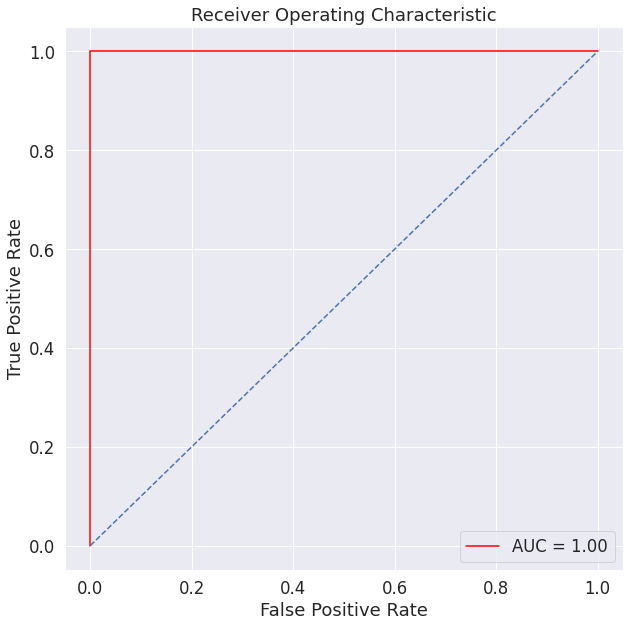

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')